In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Topic: How does people's preference for car's charateristics change over time?

- time defined as registration date year
- preference increase if there are more this type of cars in the data

In [16]:
temp_path = "../data/raw/train.csv"
data = pd.read_csv(temp_path, index_col="listing_id")

In [17]:
data.reg_date = pd.to_datetime(data.reg_date)
data.original_reg_date = pd.to_datetime(data.original_reg_date)

# Filtering columns
data_filtered = data.drop(data.columns[[17, 22, 23, 24, 27]], 1)

In [18]:
# Removing duplicate rows (keep first)
idx_duplicated = data_filtered.index.duplicated(keep="first")
data1 = data_filtered[~idx_duplicated]

In [19]:
# Impute missing reg_date
idx_missing = data1.reg_date.isna()
data1.loc[idx_missing, "reg_date"] = data1.loc[idx_missing, "original_reg_date"]

/Users/user/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


The various plots we did includes:
- lineplots, stacked bars and distribution barplot (type_of_vehicle) v.s. year
- lineplots, stacked bars and distribution barplot (make) v.s. year
- lineplots, stacked bars and distribution barplot (fuel_type) v.s. year

In [20]:
# based on the count plot, filter data to be > 2005
data1['reg_date_year'] = data1.reg_date.dt.year
data1 = data1[~(data1.reg_date.dt.year > 2021)]
data1 = data1[data1.reg_date.dt.year > 2005]

/Users/user/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data1.isna().sum()

title                    0
make                  2137
model                    0
description            337
manufactured           190
original_reg_date    16169
reg_date                 0
type_of_vehicle          0
category                 0
transmission             0
curb_weight            378
power                 2103
fuel_type            13027
engine_cap              53
no_of_owners           172
depreciation           424
coe                    869
dereg_value           1158
mileage               3573
omv                      4
arf                    244
features               386
accessories           2739
price                    0
reg_date_year            0
dtype: int64

In [22]:
# set plot style
sns.set(style="darkgrid")
sns.set_palette("tab10")

## type_of_vehicle analysis

In [23]:
data1.type_of_vehicle.unique()

array(['luxury sedan', 'van', 'mid-sized sedan', 'sports car',
       'hatchback', 'suv', 'truck', 'mpv', 'stationwagon', 'bus/mini bus',
       'others'], dtype=object)

In [24]:
data1['reg_date_year'] = data1.reg_date.dt.year
data1 = data1[~(data1.reg_date.dt.year > 2021)]
group_tb = data1.groupby(['reg_date_year', 'type_of_vehicle']).agg({'title': 'count'})
group_tb_pct = group_tb.groupby(level=0).apply(lambda x:  x / float(x.sum()))
group_tb_pct.reset_index(inplace=True)
group_tb_pct.rename({'title': '% of the year'}, inplace=True, axis=1)

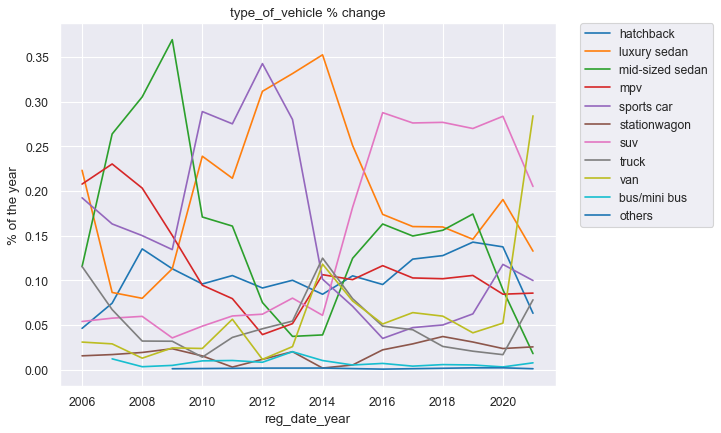

In [25]:
# lineplots for type of vehicles
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=group_tb_pct, x="reg_date_year", y="% of the year", hue="type_of_vehicle", palette=sns.color_palette("tab10", n_colors=len(data1['type_of_vehicle'].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("type_of_vehicle % change")
plt.show()

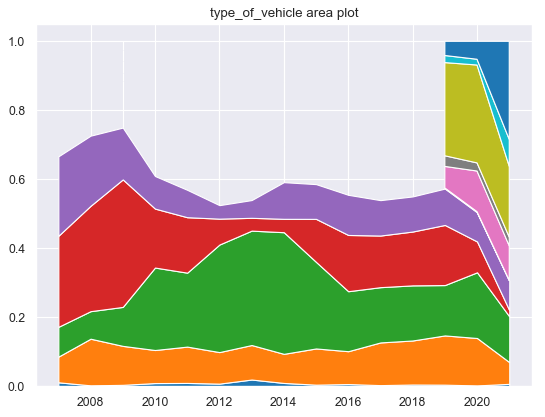

In [26]:
# stacked bar for type of vehicle
figure(figsize=(8, 6), dpi=80)
type_pivot = pd.pivot_table(group_tb_pct, values='% of the year', index=['reg_date_year'],
                    columns=['type_of_vehicle'], aggfunc=np.sum)
plt.stackplot(type_pivot.index, np.transpose(type_pivot))
plt.title('type_of_vehicle area plot')
plt.show()

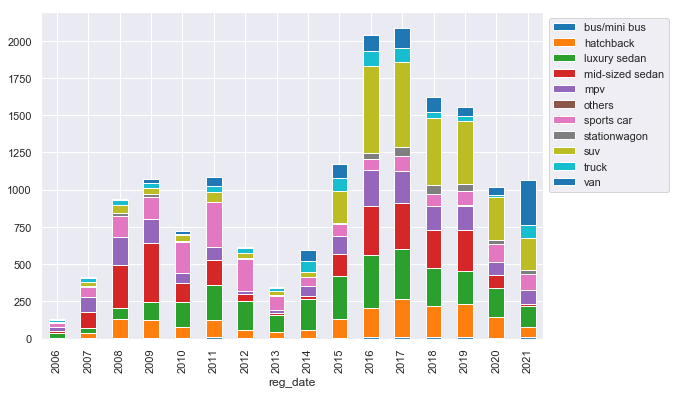

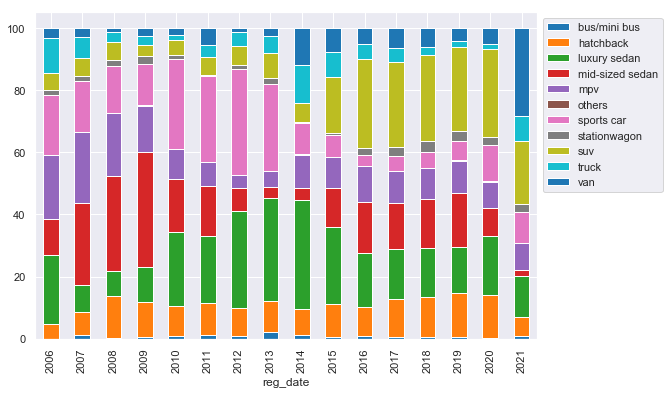

In [27]:
# distribution plots for vehicle type
# data1 = data1[~(data1.reg_date.dt.year > 2021)]
grouped_data1 = data1.groupby([data1.reg_date.dt.year, "type_of_vehicle"]).size()

# Plot absolute numbers of vehicle type
ax_type1 = grouped_data1.unstack().plot(
    kind="bar", stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

# Plot percentage of vehicle type
ax_type2 = grouped_data1.groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

# ax_type1.figure.savefig(DIR + "type-count.png")
# ax_type2.figure.savefig(DIR + "type-pct.png")

## fuel_type analysis

In [ ]:
# def add_make_model(df: pd.DataFrame) -> pd.DataFrame:
#   df['make_fill'] = df.apply(lambda x: x["make"] if not pd.isnull(x["make"]) else x["title"].lower().split()[0], axis = 1)
#   df['make_fill'][df['make_fill'] == "mercedes"] = "mercedes-benz"
#   df["make_model"] = df["make_fill"] + " " + df["model"]
#   return df

# def backfill_fuel_type(df, df_train):
#   df_train = add_make_model(df_train)
#   df_non_missing = df_train[~(df_train['fuel_type'].isna())][['make_model', 'fuel_type']]
#   grouped_series = df_non_missing.groupby(['make_model', 'fuel_type']).fuel_type.count()
#   grouped_top = pd.DataFrame(grouped_series.groupby(level='make_model').nlargest(1).reset_index(level=0, drop=True))
#   grouped_top.rename({"fuel_type": "count"}, axis=1, inplace=True)
#   grouped_top.reset_index(inplace=True)
#   grouped_top.rename({"fuel_type": "fuel_type_fill"}, axis=1, inplace=True)

#   df = df.merge(grouped_top, on='make_model', how ='left')
#   df["fuel_type"] = np.where(df['fuel_type'].isnull(), df['fuel_type_fill'], df['fuel_type'])

#   return df

# data1 = backfill_fuel_type(data1, data1)

In [28]:
data1.fuel_type[data1.fuel_type.isna()] = "missing"
group_tb2 = data1.groupby(['reg_date_year', 'fuel_type']).agg({'title': 'count'})
group_tb2_pct = group_tb2.groupby(level=0).apply(lambda x:   x / float(x.sum()))
group_tb2_pct.reset_index(inplace=True)
group_tb2_pct.rename({'title': '% of the year'}, inplace=True, axis=1)

/Users/user/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


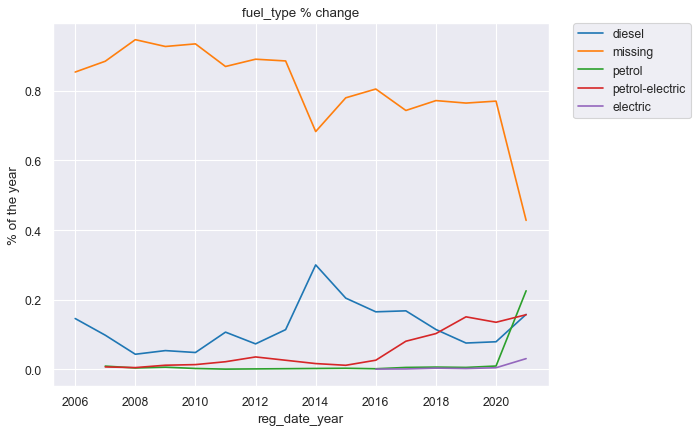

In [29]:
# lineplot for fuel_type change
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=group_tb2_pct, x="reg_date_year", y="% of the year", hue="fuel_type", palette=sns.color_palette("tab10", n_colors=len(group_tb2_pct["fuel_type"].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("fuel_type % change")
plt.show()

In [30]:
## Replace NAN with petrol - alot of these NAN vehicles are petrol
# Might not be a good idea to do this as making big assumption - to replace NAN values with 'missing'
data1.fuel_type[data1.fuel_type.isna()] = "petrol"

/Users/user/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


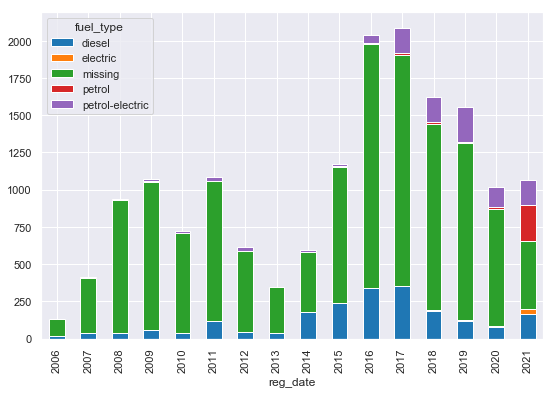

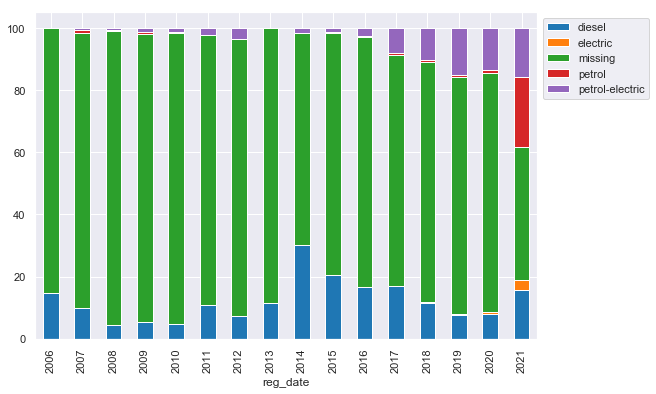

In [31]:
# distribution plots of fuel_type over years
# data1 = data1[~(data1.reg_date > "2021")]
grouped_data1 = data1.groupby([data1.reg_date.dt.year, "fuel_type"]).size()

# Plot absolute numbers of fuel type
ax_type1 = grouped_data1.unstack().plot(
    kind="bar", stacked=True, figsize=(9,6)
)

# Plot percentage of fuel type
ax_type2 = grouped_data1.groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

In [32]:
## Replace NAN with 'missing'
data1.fuel_type[data1.fuel_type.isna()] = "missing"

/Users/user/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


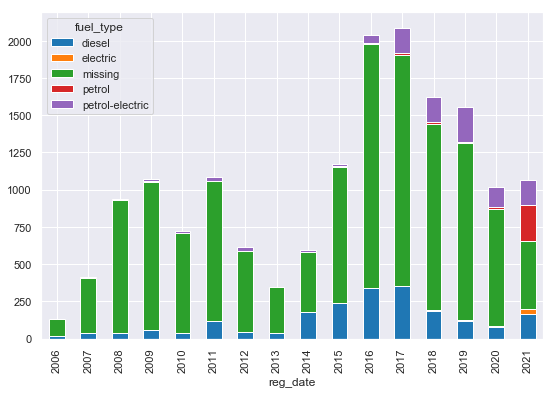

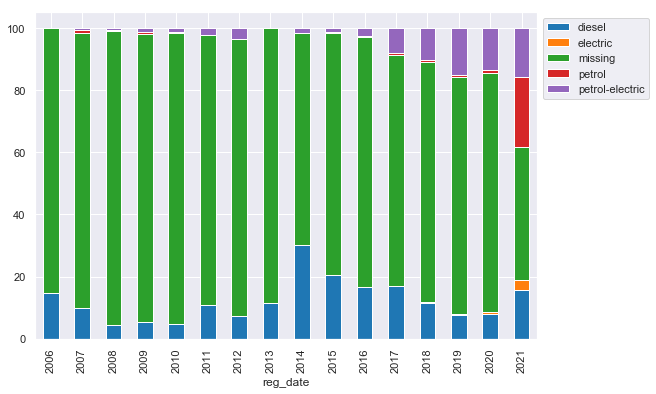

In [33]:
# distribution plots of fuel_type over years
# data1 = data1[~(data1.reg_date > "2021")]
grouped_data1 = data1.groupby([data1.reg_date.dt.year, "fuel_type"]).size()

# Plot absolute numbers of fuel type
ax_type1 = grouped_data1.unstack().plot(
    kind="bar", stacked=True, figsize=(9,6)
)

# Plot percentage of fuel type
ax_type2 = grouped_data1.groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

## make analysis

In [36]:
# make new column "complete_make" that takes first word from title 
data1['complete_make'] = [title.split(" ")[0].lower() for title in data1.title]

In [37]:
# Rename mercedes to mercedes-benz
# Combine makes with counts less than 10 into "others" category
MIN_COUNT = 10
data1.complete_make[data1.complete_make == "mercedes"] = "mercedes-benz"

make_counts = data1.complete_make.value_counts().sort_values()
unpopoular_makes = make_counts.index[make_counts < MIN_COUNT].to_list()
print(unpopoular_makes)
data1.complete_make[data1.complete_make.isin(unpopoular_makes)] = "others"

['daf', 'austin', 'hafei', 'chrysler', 'international', 'higer', 'dongfeng', 'iveco', 'dodge', 'joylong', 'mitsuoka', 'chery', 'golden', 'ruf', 'tesla', 'daimler', 'saab', 'yutong', 'cupra', 'man', 'hummer', 'mg', 'alpine', 'foton', 'ud', 'lotus', 'scania', 'perodua', 'maxus']


/Users/user/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/user/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [38]:
data1.complete_make.value_counts()

toyota           2871
mercedes-benz    2146
honda            2118
bmw              1615
nissan           1077
audi              680
mitsubishi        669
volkswagen        610
hyundai           566
mazda             541
kia               498
porsche           366
lexus             312
subaru            289
mini              200
volvo             191
suzuki            189
isuzu             105
land              104
jaguar            103
maserati          100
bentley            94
peugeot            90
renault            90
citroen            90
others             78
lamborghini        59
ferrari            57
skoda              56
ford               55
rolls-royce        55
opel               51
fiat               45
ssangyong          41
chevrolet          40
hino               37
seat               30
infiniti           27
mclaren            24
proton             23
aston              22
byd                20
jeep               15
daihatsu           13
alfa               11
Name: comp

In [40]:
# Get the top 5 makes by year
grouped_make_series = data1.groupby(['reg_date_year', 'complete_make']).title.count()
grouped_make_top = pd.DataFrame(grouped_make_series.groupby(level='reg_date_year').nlargest(5).reset_index(level=0, drop=True)).reset_index() 

In [41]:
data_make = data1[data1['complete_make'].isin(grouped_make_top['complete_make'].unique())]
data_make_group = data_make.groupby(['reg_date_year', 'complete_make']).agg({'title': 'count'}).reset_index()
data_make_group.rename({"title": "count_make"}, axis = 1, inplace = True)

In [42]:
grouped_year = pd.DataFrame(data1.groupby(['reg_date_year']).title.count())
grouped_year.rename({"title": "count_total"}, axis = 1, inplace = True)
grouped_year.reset_index(inplace=True)
data_make_group_merge = data_make_group.merge(grouped_year, how = 'left', on = "reg_date_year")
data_make_group_merge["% of total"] = data_make_group_merge["count_make"]/data_make_group_merge["count_total"]

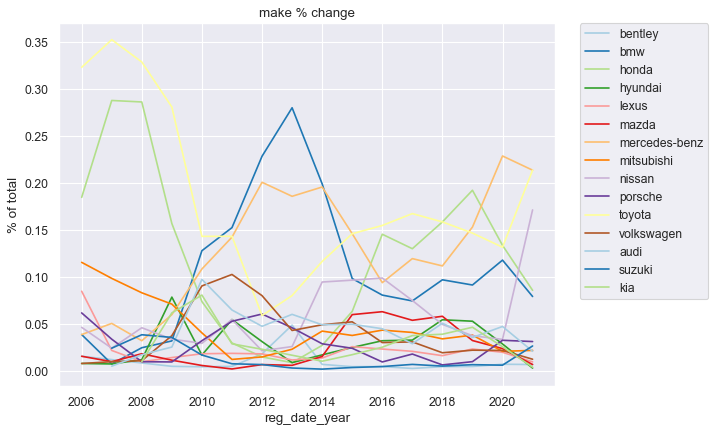

In [43]:
# lineplots for make 
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=data_make_group_merge, x="reg_date_year", y="% of total", hue="complete_make", palette=sns.color_palette("Paired", n_colors=len(grouped_make_top['complete_make'].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("make % change")
plt.show()

In [ ]:
data_make_group_merge

,reg_date_year,complete_make,count_make,count_total,% of total
0,2006,bentley,2,130,0.015385
1,2006,bmw,5,130,0.038462
2,2006,honda,24,130,0.184615
3,2006,hyundai,1,130,0.007692
4,2006,lexus,11,130,0.084615
...,...,...,...,...,...
228,2021,nissan,182,1063,0.171214
229,2021,porsche,33,1063,0.031044
230,2021,suzuki,28,1063,0.026341
231,2021,toyota,227,1063,0.213547


- The top 5 brands contains both economical as well as luxury car choices 
- Zoom in to some specific brands: e.g. lexus becomes less popular over the years
- bmw and mercedes is on the rise, maybe coz they have new petro-electric car coming as well?


In [44]:
# separate car makes into economy and luxury
economy_make = ['toyota', 'honda', 'mitsubishi','nissan', 'suzuki', 'hyundai', 'kia', 'mazda']
luxury_make = ['lexus', 'porsche', 'mercedes-benz','bmw', 'audi', 'volkswagen', 'bentley']

data_make_economy = data_make_group_merge[data_make_group_merge['complete_make'].isin(economy_make)]
data_make_luxury = data_make_group_merge[data_make_group_merge['complete_make'].isin(luxury_make)]

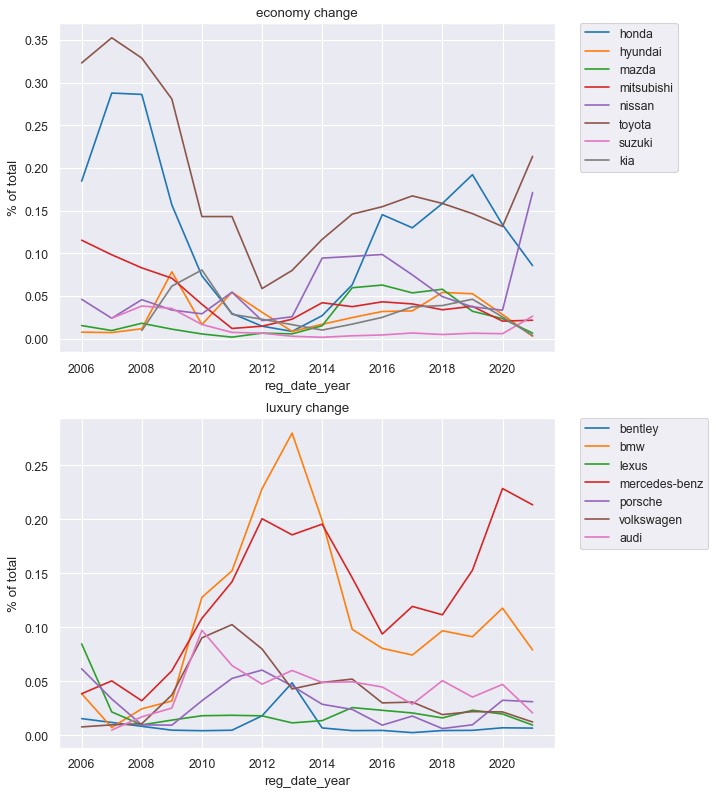

In [45]:
#lineplots for economy and luxury makes
figure(figsize=(8, 12), dpi=80)
plt.subplot(2, 1, 1)
sns.lineplot(data=data_make_economy, x="reg_date_year", y="% of total", hue="complete_make", palette=sns.color_palette("tab10", n_colors=len(data_make_economy['complete_make'].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("economy change")

plt.subplot(2, 1, 2)
sns.lineplot(data=data_make_luxury, x="reg_date_year", y="% of total", hue="complete_make", palette=sns.color_palette("tab10", n_colors=len(data_make_luxury['complete_make'].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("luxury change")
plt.show()

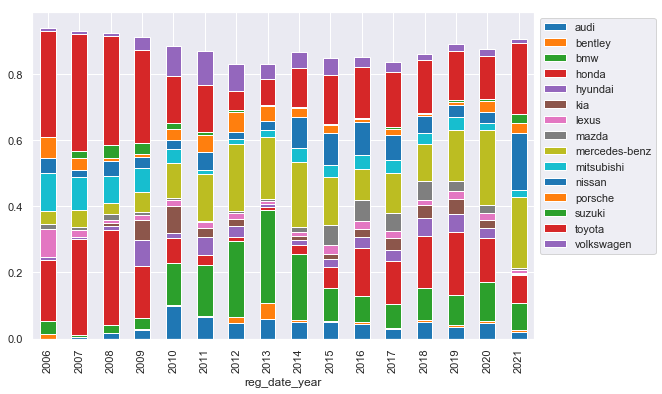

In [46]:
# distribution barplots for makes from yearly top 5 list
pd.pivot_table(data_make_group_merge, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum).plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

<Figure size 640x960 with 0 Axes>

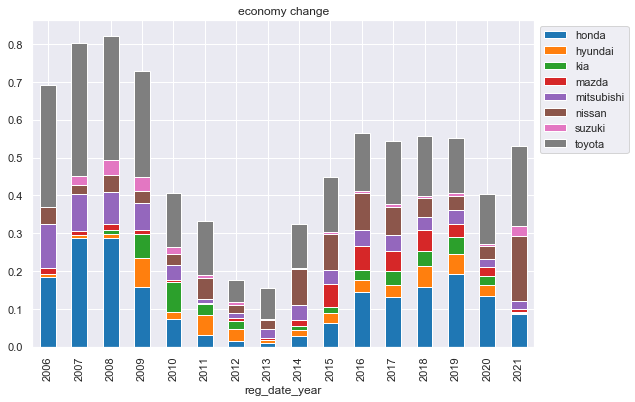

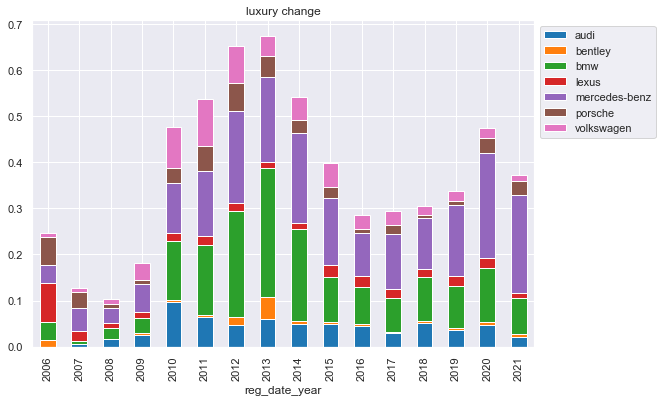

In [47]:
# distribution barplots for economy and luxury makes from yearly top 5 list
figure(figsize=(8, 12), dpi=80)
pd.pivot_table(data_make_economy, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum).plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))
plt.title("economy change")
plt.show()

pd.pivot_table(data_make_luxury, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum).plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))
plt.title("luxury change")
plt.show()

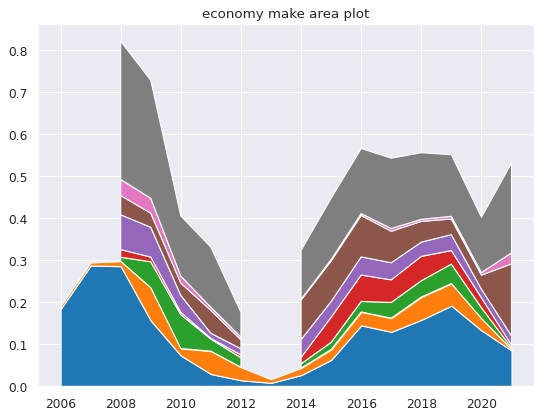

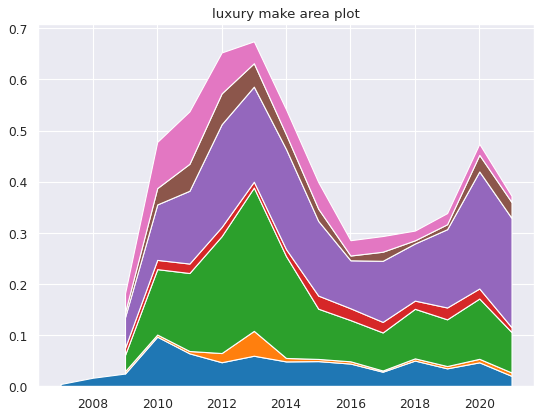

In [ ]:
# stacked bar for economy and luxury makes from yearly top 5 list
figure(figsize=(8, 6), dpi=80)
economy_pivot = pd.pivot_table(data_make_economy, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum)
plt.stackplot(economy_pivot.index, np.transpose(economy_pivot))
plt.title('economy make area plot')
plt.show()

figure(figsize=(8, 6), dpi=80)
luxury_pivot = pd.pivot_table(data_make_luxury, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum)
plt.stackplot(luxury_pivot.index, np.transpose(luxury_pivot))
plt.title('luxury make area plot')
plt.show()

## analysis of engine_cap vs reg_date

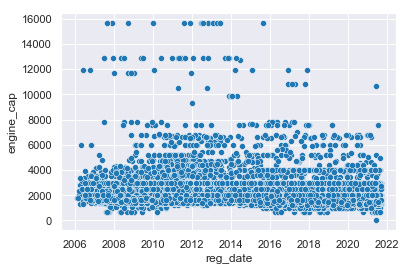

In [49]:
sns.scatterplot(data=data1, x="reg_date", y="engine_cap")

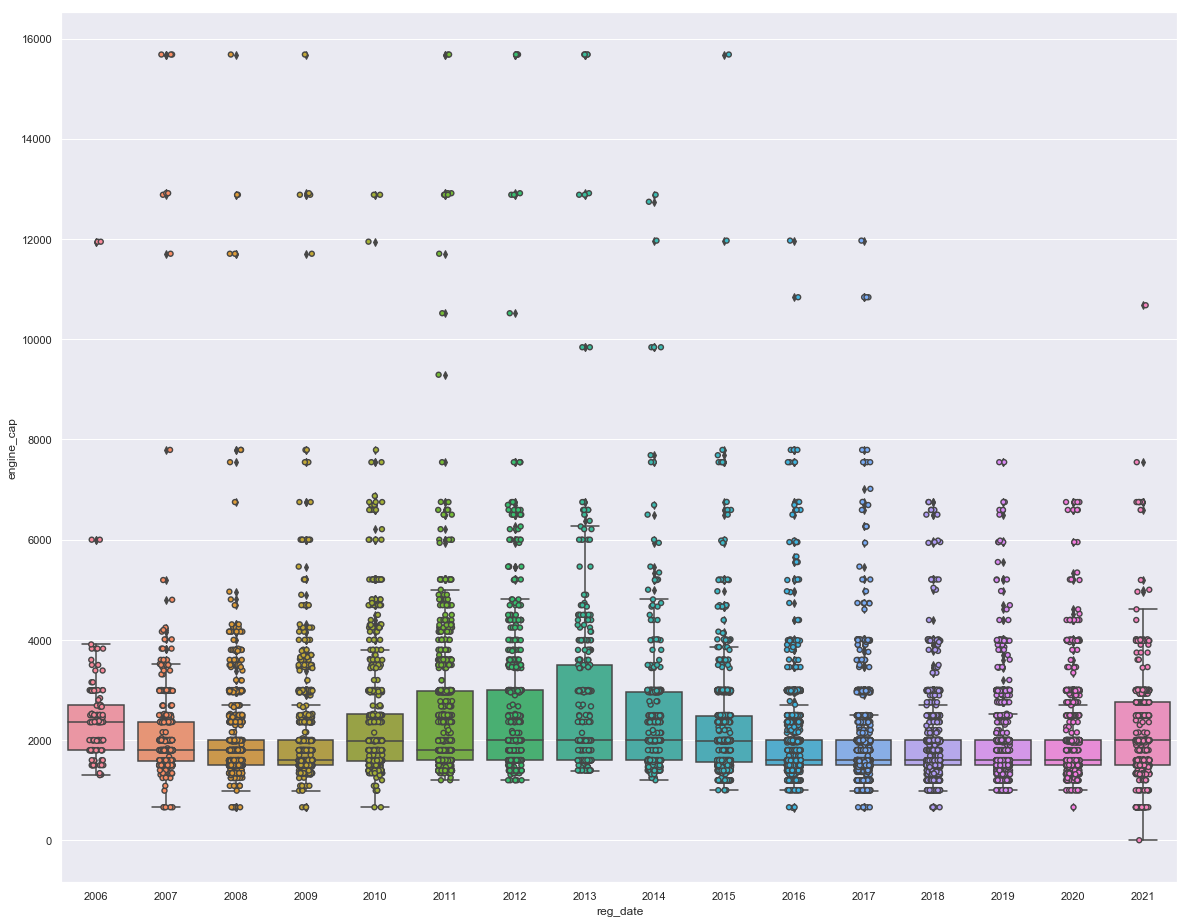

In [50]:
# boxplots of yearly engine_cap
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(x=data1.reg_date.dt.year, y=data1.engine_cap)
sns.stripplot(x=data1.reg_date.dt.year, y=data1.engine_cap, linewidth=1.4)

In [51]:
# minimum, maximum, mean and standard deviation for engine_cap over the years
data1.groupby(data1.reg_date.dt.year).agg(min_engine_cap=('engine_cap',np.min),max_engine_cap=('engine_cap',np.mean),mean_engine_cap=('engine_cap',np.mean), std_engine_cap=('engine_cap',np.std))

,min_engine_cap,max_engine_cap,mean_engine_cap,std_engine_cap
reg_date,,,,
2006,1298.0,2530.723077,2530.723077,1401.767622
2007,658.0,2227.784173,2227.784173,1694.715721
2008,658.0,2016.438298,2016.438298,1097.425175
2009,658.0,2026.509328,2026.509328,1133.732068
2010,658.0,2342.681944,2342.681944,1300.432601
2011,1197.0,2408.873500,2408.873500,1446.406570
2012,1197.0,2712.845024,2712.845024,1859.700783
2013,1390.0,2899.174286,2899.174286,2162.259130
2014,1197.0,2353.347386,2353.347386,1287.384708


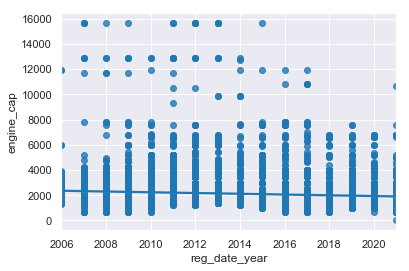

In [59]:
sns.regplot(data = data1, x='reg_date_year', y='engine_cap')

## analysis of curb_weight vs reg_date

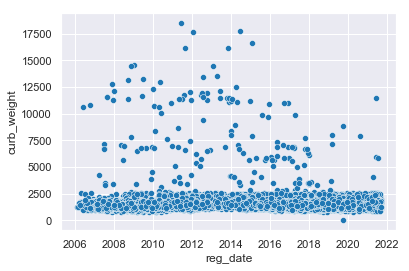

In [52]:
sns.scatterplot(data=data1, x="reg_date", y="curb_weight")

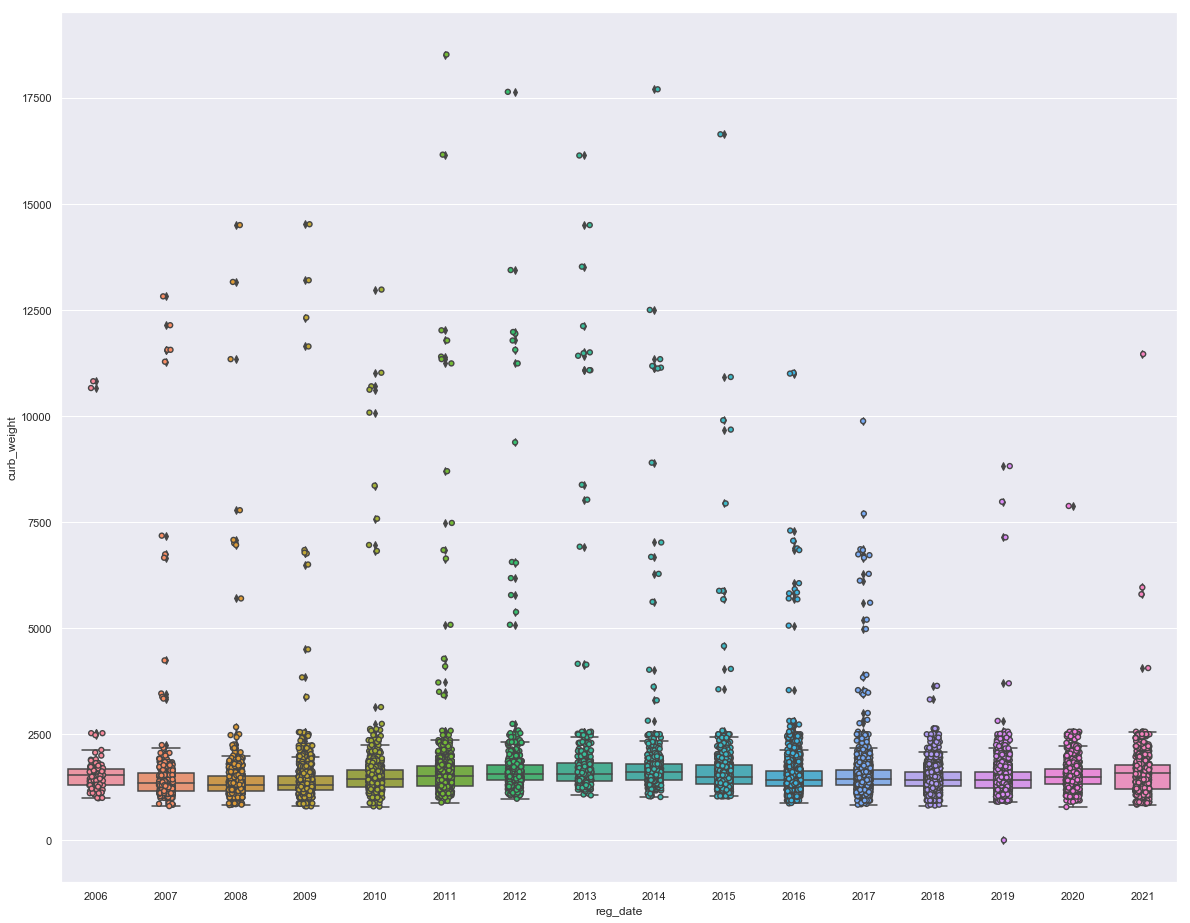

In [53]:
# boxplots of yearly curb_weight
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(x=data1.reg_date.dt.year, y=data1.curb_weight)
sns.stripplot(x=data1.reg_date.dt.year, y=data1.curb_weight, linewidth=1.4)

In [54]:
# minimum, maximum, mean and standard deviation for curb_weight over the years
data1.groupby(data1.reg_date.dt.year).agg(min_curb_weight=('curb_weight',np.min),max_curb_weight=('curb_weight',np.max),mean_curb_weight=('curb_weight',np.mean), std_curb_weight=('curb_weight',np.std))

,min_curb_weight,max_curb_weight,mean_curb_weight,std_curb_weight
reg_date,,,,
2006,990.0,10820.0,1656.976923,1175.323604
2007,806.0,12820.0,1563.592326,1274.829395
2008,830.0,14500.0,1412.260128,818.287512
2009,800.0,14520.0,1443.790112,838.376021
2010,795.0,12980.0,1587.088889,963.713785
2011,891.0,18520.0,1641.287697,1080.750489
2012,980.0,17640.0,1779.132137,1350.771961
2013,1060.0,16140.0,1978.934097,1867.871919
2014,1020.0,17700.0,1787.500843,1255.108810


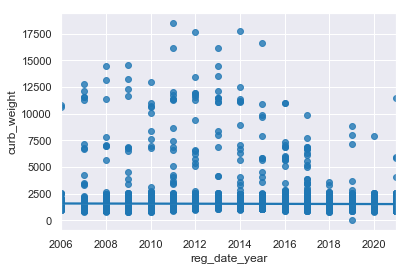

In [60]:
sns.regplot(data = data1, x='reg_date_year', y='curb_weight')

## analysis of power vs reg_date

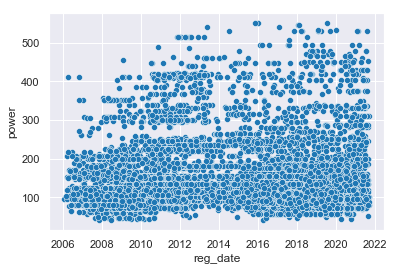

In [55]:
sns.scatterplot(data=data1, x="reg_date", y="power")

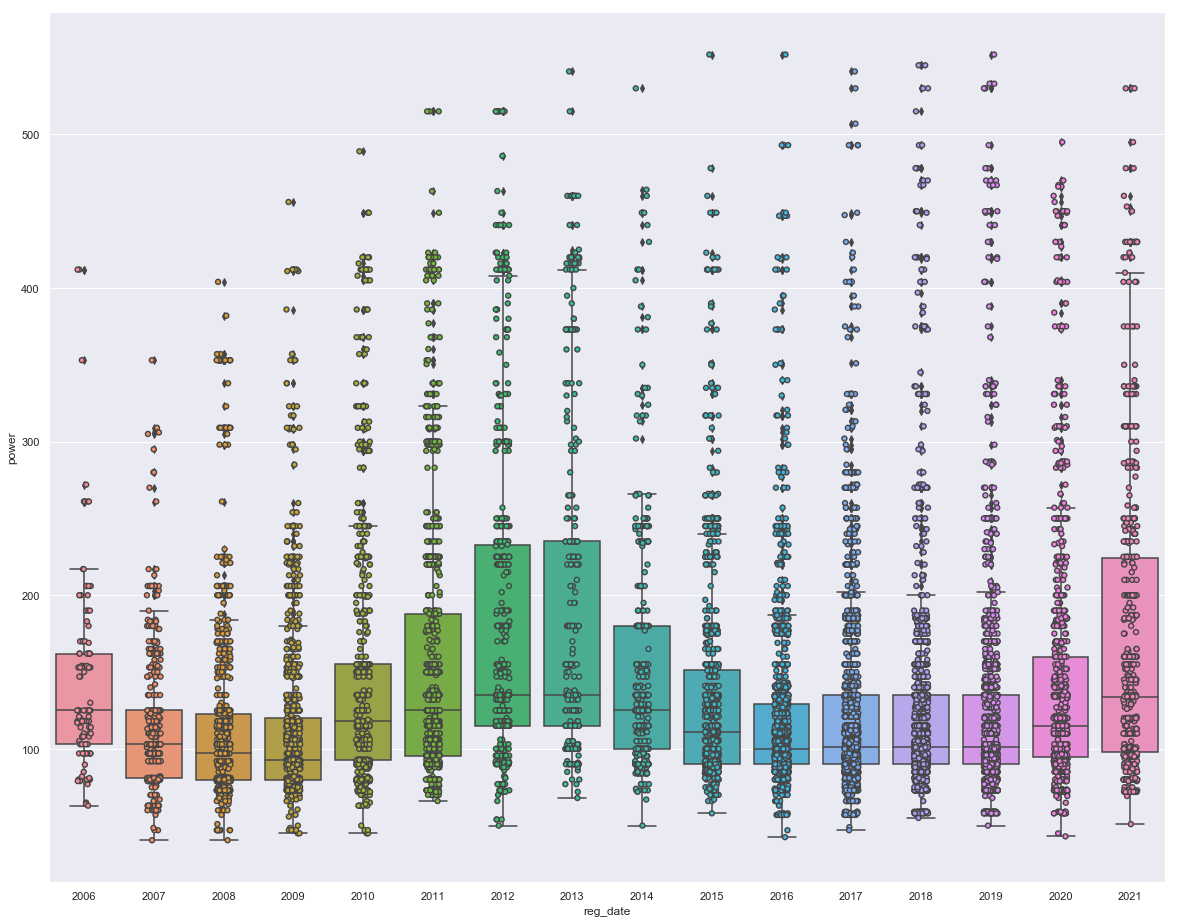

In [56]:
# boxplots of yearly power
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(x=data1.reg_date.dt.year, y=data1.power)
sns.stripplot(x=data1.reg_date.dt.year, y=data1.power, linewidth=1.4)

In [57]:
# minimum, maximum, mean and standard deviation for power over the years
data1.groupby(data1.reg_date.dt.year).agg(min_power=('power',np.min),max_power=('power',np.max),mean_power=('power',np.mean), std_power=('power',np.std))

,min_power,max_power,mean_power,std_power
reg_date,,,,
2006,63.0,412.0,142.799099,62.809048
2007,40.5,353.0,115.377419,46.553878
2008,40.5,404.0,115.215978,60.643779
2009,45.0,456.0,114.659068,56.345690
2010,45.0,489.0,148.844606,82.135381
2011,66.0,515.0,156.629012,83.684331
2012,50.0,515.0,184.725131,102.782841
2013,68.0,541.0,195.564444,112.346544
2014,50.0,530.0,149.277878,75.497213


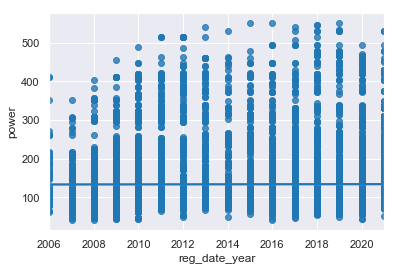

In [61]:
sns.regplot(data = data1, x='reg_date_year', y='power')